## Code ALongs - MLP - Multilayered perceptron

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [19]:
x_train.shape

(60000, 28, 28)

7

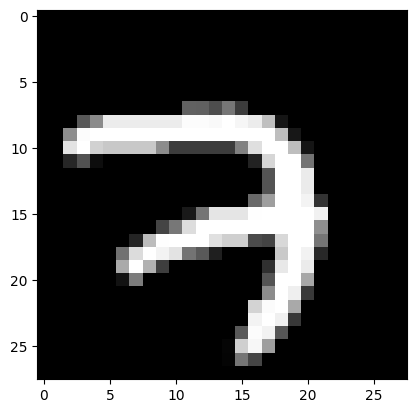

In [20]:

plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [21]:
x_train[5000].shape

(28, 28)

In [22]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [23]:
# Pixel intesity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [24]:
# Pixel value at row 10, column 5 for image 5000
x_train[5000, 10, 5]

199

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

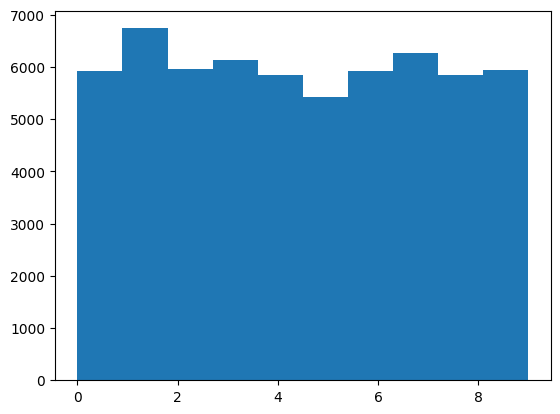

In [27]:
plt.hist(y_train)

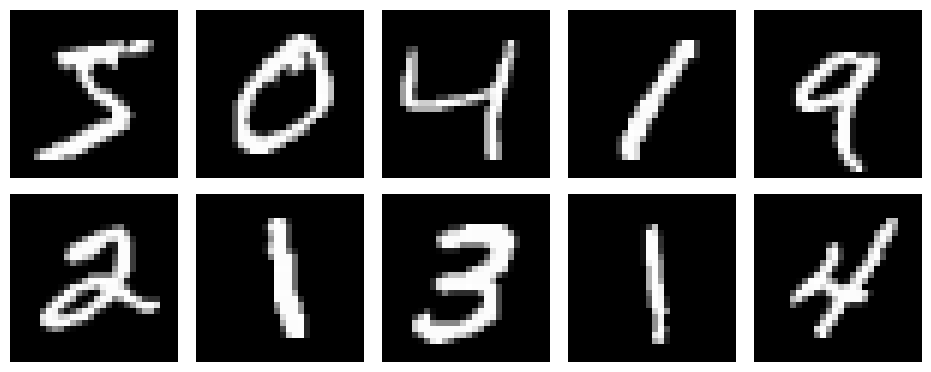

In [28]:
def display_images(data, n_rows = 2, n_cols = 5, figsize = (12, 4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)


display_images(x_train)

(10, 28, 28)

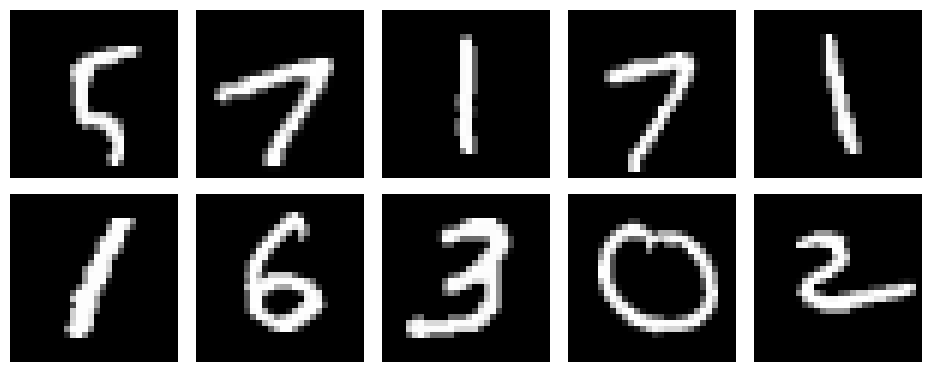

In [29]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize Data

In [30]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [31]:
X_train[5000].reshape(-1).shape

(784,)

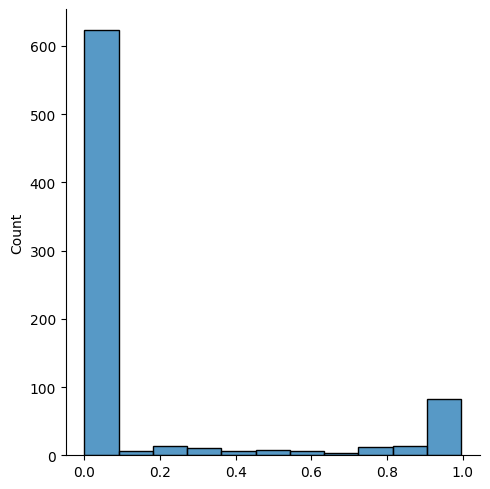

In [32]:
import seaborn as sns

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

## MLP model

- 10 output neurons/nodes (Which represents 0-9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28*28) -> use Flatten layer
- hidden layers -> Dense

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense 

def mlp_model(neurons: tuple | list = None, names: tuple | list = None, activations: tuple | list = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape=(28, 28), name = "Input_layer"))
    
    ## Hidden layers + outputs
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"]
    )

    
    return model

# Naive because we don't have any hidden layers
model_naive = mlp_model(neurons={10}, names={"Output_layer"}, activations={"softmax"})
model_naive.summary()

c:\School Code\OPA23\Artificial_Intelligence_Hampus_Erlandsson_OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.7919 - loss: 0.7895 - val_accuracy: 0.9153 - val_loss: 0.3071
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9070 - loss: 0.3293 - val_accuracy: 0.9243 - val_loss: 0.2768
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9179 - loss: 0.2882 - val_accuracy: 0.9276 - val_loss: 0.2667
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.9193 - loss: 0.2855 - val_accuracy: 0.9272 - val_loss: 0.2609
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9230 - loss: 0.2736 - val_accuracy: 0.9303 - val_loss: 0.2569
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9252 - loss: 0.2647 - val_accuracy: 0.9297 - val_loss: 0.2567
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9264 - loss: 0.2663 - val_accuracy: 0.9288 - val_loss: 0.2582
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9266 -

In [35]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86788,0.507813,0.9153,0.307119
1,0.91168,0.316631,0.9243,0.276824
2,0.91752,0.292997,0.9276,0.266740
3,0.92088,0.280996,0.9272,0.260878
4,0.92390,0.273489,0.9303,0.256901


In [36]:
model_naive.history.history

{'accuracy': [0.8678799867630005,
  0.9116799831390381,
  0.9175199866294861,
  0.9208800196647644,
  0.9239000082015991,
  0.9242799878120422,
  0.926360011100769,
  0.9264600276947021,
  0.9280400276184082,
  0.9292799830436707,
  0.9287199974060059,
  0.9299399852752686,
  0.9300600290298462,
  0.9303600192070007,
  0.9314799904823303,
  0.9318400025367737,
  0.9317399859428406,
  0.9323800206184387,
  0.9323599934577942,
  0.9334400296211243],
 'loss': [0.5078127384185791,
  0.3166311979293823,
  0.2929973900318146,
  0.2809961140155792,
  0.2734885513782501,
  0.2682923972606659,
  0.26389557123184204,
  0.2608630955219269,
  0.2578255534172058,
  0.25520727038383484,
  0.25350162386894226,
  0.2517281174659729,
  0.250319242477417,
  0.24860431253910065,
  0.24736468493938446,
  0.2459259033203125,
  0.24557745456695557,
  0.244079127907753,
  0.2430095672607422,
  0.24214351177215576],
 'val_accuracy': [0.9153000116348267,
  0.9243000149726868,
  0.9276000261306763,
  0.92720001

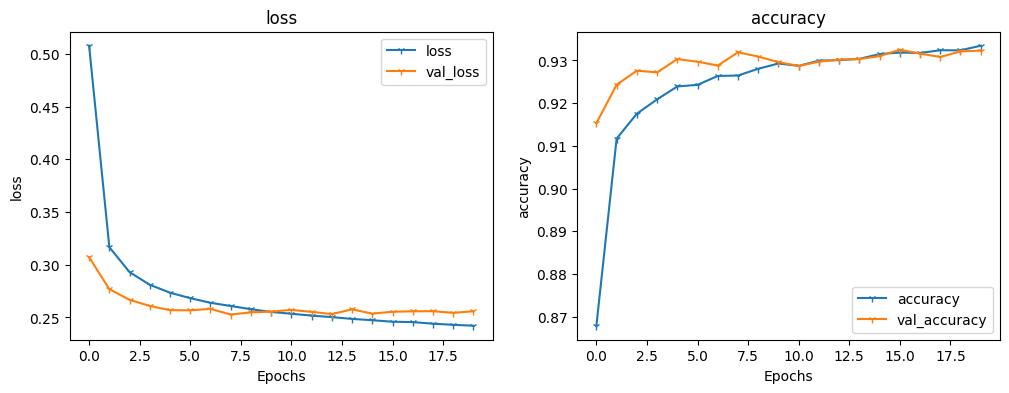

In [37]:
def plot_metrics(df_history, style="-1"):
    _, axes = plt.subplots(1,2,figsize=(12,4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs", ylabel=metric[0], title=metric[0], ax=ax, style=style)

plot_metrics(naive_history)


## Add hidden layers

In [38]:
model_deep = mlp_model(neurons=[128,128,10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"])

model_deep.summary()

c:\School Code\OPA23\Artificial_Intelligence_Hampus_Erlandsson_OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.4582 - val_accuracy: 0.9631 - val_loss: 0.1286
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9663 - loss: 0.1114 - val_accuracy: 0.9680 - val_loss: 0.1040
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9790 - loss: 0.0707 - val_accuracy: 0.9706 - val_loss: 0.1053
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0530 - val_accuracy: 0.9740 - val_loss: 0.0893
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9744 - val_loss: 0.0870
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9743 - val_loss: 0.1025
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9783 - val_loss: 0.0824
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0198 - 

In [40]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92270,0.261741,0.9631,0.128603
1,0.96674,0.109444,0.9680,0.104018
2,0.97682,0.074495,0.9706,0.105267
3,0.98212,0.054798,0.9740,0.089333
4,0.98594,0.043631,0.9744,0.086963


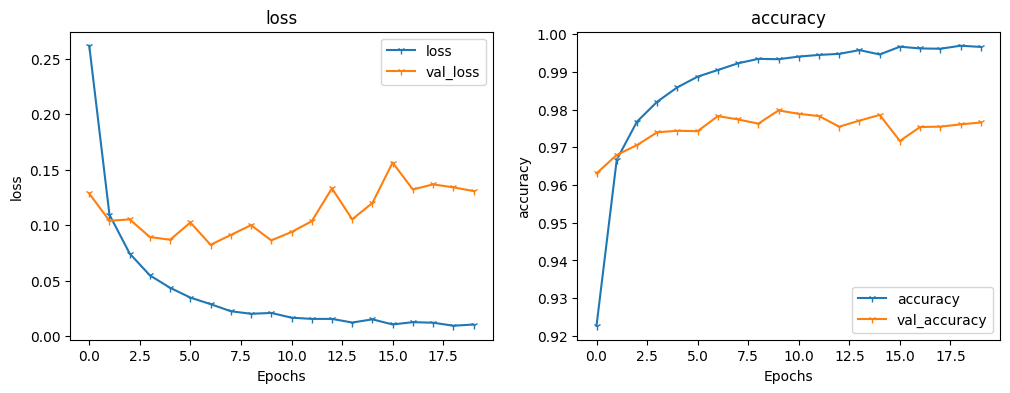

In [41]:
plot_metrics(deep_history)

In [42]:
# Trains on all training data
model_deep.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9919 - loss: 0.0326
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9960 - loss: 0.0129
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9965 - loss: 0.0109


## Prediction and evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


array([[2.9900071e-10, 6.8629640e-07, 1.0964871e-10, ..., 9.9509984e-01,
        6.6047723e-10, 4.8993868e-03],
       [1.3626489e-20, 6.2578671e-15, 1.0000000e+00, ..., 6.0396917e-27,
        6.6414642e-17, 1.5510975e-27],
       [1.2717587e-10, 9.9999595e-01, 1.3389253e-09, ..., 5.0894397e-07,
        1.4993644e-06, 1.6530863e-10],
       ...,
       [6.2625267e-22, 1.8594897e-19, 4.2175347e-23, ..., 8.8052683e-15,
        8.7261409e-18, 1.5071973e-11],
       [2.9839411e-18, 3.1443655e-20, 8.8300398e-27, ..., 8.8794430e-15,
        1.4918890e-12, 7.1846557e-21],
       [2.8011224e-18, 3.6924853e-33, 3.2921929e-25, ..., 5.2505964e-28,
        3.4757855e-20, 7.3581213e-21]], dtype=float32)

In [44]:
y_pred[0]

array([2.9900071e-10, 6.8629640e-07, 1.0964871e-10, 1.1993049e-07,
       3.1108460e-11, 9.2549017e-09, 2.0295729e-16, 9.9509984e-01,
       6.6047723e-10, 4.8993868e-03], dtype=float32)

In [45]:
y_pred.shape

(10000, 10)

In [46]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



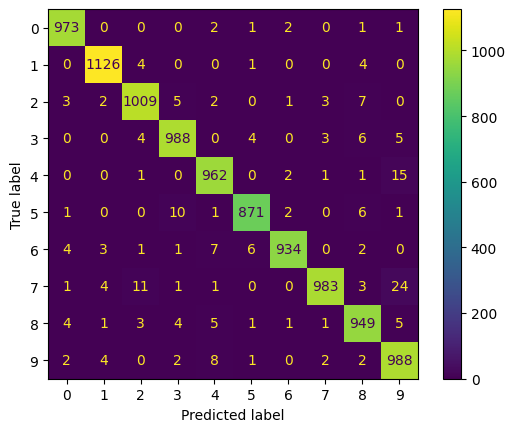

In [54]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Some misclassifications

In [55]:
(y_pred != y_test).sum()

217

In [59]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([ 43, 151, 259, 321, 340, 445, 495, 582, 619, 659], dtype=int64)

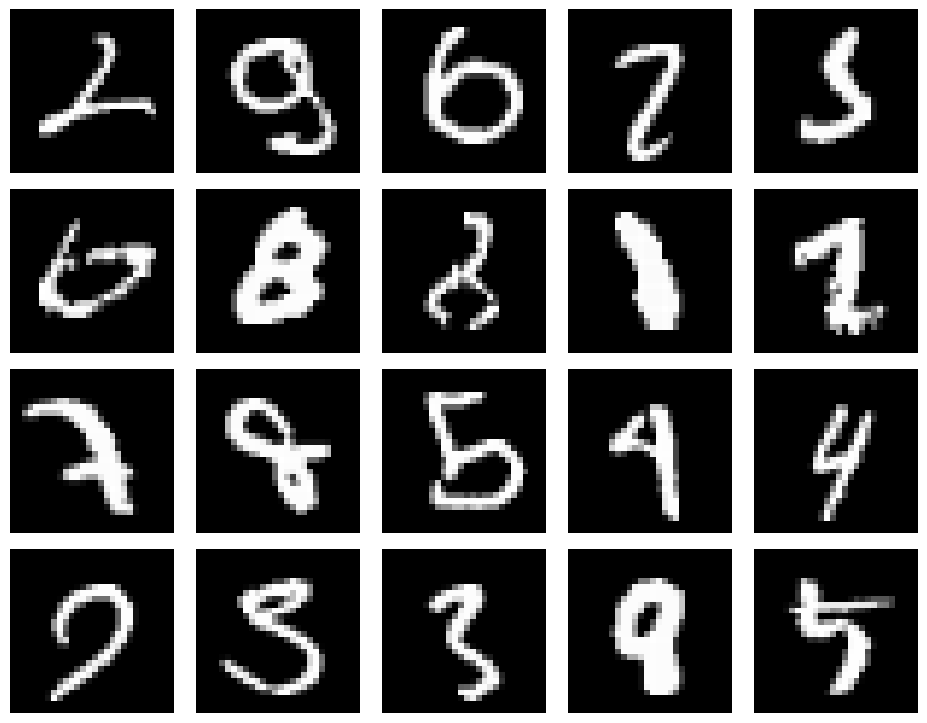

In [60]:
display_images(X_test[misclassified_indices], 4, 5, (12, 8))